# Intro to CNNs !!!
$\textbf{Dense Neural Networks (DNN) looks for patterns globally}$ like for identification of a cat, if training data has eyes on left side of image, the testing one should also have it the same way. Passing a flipped image would not work as it would keep on looking for eyes in the same region. Here, all neurons are connected to all other so they read all the data passed ahead, hence look at the global picture.

$\textbf{Convolutional Neural Networks (CNN)}$ then comes into picture which identifies local patterns like how does an eyes, ears, paws, nose, etc look like and then looks for similiar patterns anywhere in the image.

Here, all the $\textbf{neurons are not connected densely to others so look only at specific features available locally}$.

Multi-layered CNN has some layers looking for lines and edges, tthe next ones forming shapes from the combination of these lines and edges and final ones forming typical objects with the shapes obtained.

$\textbf{Feature maps}$ - are 3D tensors with 2 special axes (width and height) and 1 depth axes. They are the inputs  for CNNs which returns new feature maps representing the presence of specific features in them. These new maps are called $\textbf{Response maps}$. The parts of input image (taken as same size as of features) undergoes dot product with the feature map's pattern and we get new matrices which then depict the new pattern found for the next level of feature.

$\textbf{Filters}$ - mxn pixels representing the presence or absence of features. No of features noted = depth of response map which has matrix indicating the same.

$\textbf{Border padding}$ - adding random pixels layer around the image so that extraction of 3x3 or 5x5 parts can enable having even the corner pixels of the image as the centre of a part to be tested.

## Analysing the dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train, y_train), (test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
#Normalise pixel values
train, test = train/255, test/255
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

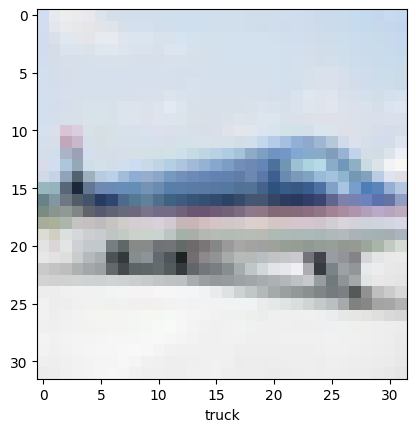

In [4]:
#Plotting an image
plt.imshow(test[524], cmap = plt.cm.binary)
plt.xlabel(class_names[y_train[1][0]])
plt.show()

## Creating the model
General architecture - stack of Conv2D and Maxpooling2D layers to get features and fed to dense layers to get class of the image.

### 1. Convolutional base

In [5]:
model = models.Sequential()
model.add(
    layers.Conv2D(32, (3,3), activation = 'relu',          # We process 32 filters of size 3x3 with relu activation func
    input_shape = (32,32,3)
))
model.add(layers.MaxPooling2D((2,2)))                       # Maxpooling operation using 2x2 sample and step of 2 pixels

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))    # Inc features from 32 to 64 as data is shrunk in spacial dimention
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [6]:
model.summary()
#Output shape is 30,30,32 as 1 layer from the sides is considered padding layer but the depth remains the same
#Depth of image increases to 64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

### 2. Dense layers

In [7]:
model.add(layers.Flatten())                                 #Makes array from the matrix 4,4,64
model.add(layers.Dense(units = 64, activation = 'relu'))    #Dense layer with 64 neurons
model.add(layers.Dense(10))                                 #Output layer for 10 classes

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compiling the model
Hyper-parameter tuning

In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

## Training and testing the model
We did both the operations together by passing cross-validation data at the same time and as we use the same test set for testing, we get same test_acc during evaluation.

In [10]:
history = model.fit(train, y_train, epochs = 10,
                   validation_data = (test, y_test))

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5301 - accuracy: 0.4384 - val_loss: 1.2401 - val_accuracy: 0.5535
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1583 - accuracy: 0.5881 - val_loss: 1.1558 - val_accuracy: 0.6035
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0041 - accuracy: 0.6463 - val_loss: 1.0285 - val_accuracy: 0.6351
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9116 - accuracy: 0.6802 - val_loss: 0.9188 - val_accuracy: 0.6801
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8321 - accuracy: 0.7089 - val_loss: 0.8863 - val_accuracy: 0.6934
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7740 - accuracy: 0.7299 - val_loss: 0.8509 - val_accuracy: 0.7036
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7223 - accuracy: 0.7457 - val_loss: 0.8230 -

## Evaluating the model

In [10]:
test_loss, test_acc = model.evaluate(test, y_test, verbose = 2)
print(test_acc)

313/313 - 2s - loss: 2.3070 - accuracy: 0.1000 - 2s/epoch - 7ms/step
0.10000000149011612


## Predicting from model

In [12]:
pred = model.predict(test)

313/313 [==============================] - 2s 6ms/step


In [13]:
print("Prediction: ",class_names[np.argmax(pred[524])])
print("Actual: ",class_names[y_test[524][0]])

Prediction:  airplane
Actual:  airplane


# Data Augmentation for improving model performance
We edit the images to increase training set to get better training performance

In [35]:
# from keras.preprocessing.image import ImageDataGenerator
# data_gen = ImageDataGenerator(
#     rotation_range = 40,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True,
#     fill_mode = 'nearest'
# )

# for i in range(len(train)):
#     img = tf.keras.utils.img_to_array(train[i])
#     img = img.reshape((1,) + img.shape)
    
#     j=0
#     for batch in data_gen.flow(img, save_prefix = 'test', save_format = 'jpeg'):
#         if(j>4):
#             break;
#         j+=1

# Using pretrained model to improve performance